In [1]:
import pandas as pd

In [2]:
# 시각화의 대표 라이브러리
from matplotlib import pyplot as plt
import matplotlib

In [3]:
# 시본: seaborn : mat~ 기반으로 더욱 확장된 형태의 시각화 도구
# 산포행렬, 시계열, 산포도, 박스플롯, 선형회귀, 변수플로팅등에 탁월

In [4]:
# 차트가 주피터에 삽입(결과창에 등장)
%matplotlib inline

In [5]:
# 한글 처리
matplotlib.rc( 'font', family='Malgun Gothic' )

In [6]:
import sklearn.datasets

In [7]:
# 아이리스 데이터 로드 함수
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    # 관찰결과, data(실데이터) 항목과 feature_names(컬럼)을 획득해서 DF로 생성
    #print( type(ds), ds )
    df = pd.DataFrame( ds['data'], columns=ds['feature_names'] )
    # df 자체에 데이터는 존재하나,  그 데이터가 무엇을 의미하는지가 없다
    # 본 데이터는 지도학습법에 관련된 데이터로써 형태를 맞춰주는게 중요
    #print( '데이터가 지향하는 결과 종류 => ',  ds['target_names'] )
    # ['setosa' 'versicolor' 'virginica']
    # { 0:'setosa', 1:'versicolor', ... }
    #print(  dict( zip( range(3), ds['target_names'] ) )   )
    #print(  dict( zip( ['A','B','C'], ds['target_names'] ) )   )
    
    # 관련없는 2개의 연속데이터를 키와 값을 세트로 재구성
    targer_dic = dict( zip( range(3), ds['target_names'] ) )
    tmp = [ targer_dic[n] for n in ds['target'] ]
    #print( '정답 나열 => ', tmp  )
    df['species'] = tmp
    return df

In [8]:
df = get_iris_df()
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## 원형차트 => 파이차트

- 중요한 문서, 발표자료에 거의 사용을 않한다
- 데이터를 깔끔하게 보여주는 장점
- 원형차트의 데이터는 수치표로도 보여줄수 있다
- 사용이유. 시각화의 목적 : 같은 정보를 어떻게 표현하면 좀더 쉽게 이해시킬수 있을가?
- 비교하는 데이터의 종류가 적을 경우 유리, 

In [9]:
# 종별 변수 데이터 평균
sums_by_species = df.groupby('species').sum()
sums_by_species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,250.3,170.9,73.2,12.2
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [10]:
# 첫번째 컬럼 데이터 획득
var_name = sums_by_species.columns[0]
var_name, sums_by_species[ var_name ]

('sepal length (cm)', species
 setosa        250.3
 versicolor    296.8
 virginica     329.4
 Name: sepal length (cm), dtype: float64)

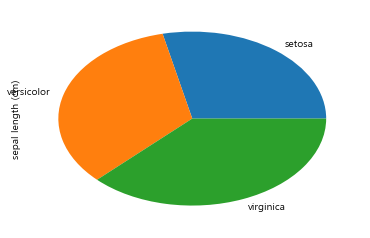

In [11]:
sums_by_species[ var_name ].plot(kind='pie', fontsize=10)  

Text(0.5,1,'sepal length (cm) 기준으로 분류한 붓꽃의 데이터 크기 비교')

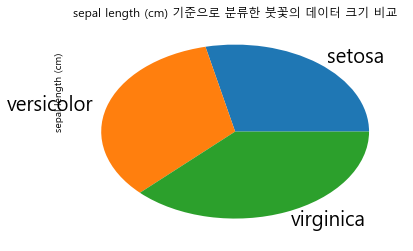

In [12]:
sums_by_species[ var_name ].plot(kind='pie', fontsize=20)  
# 데이터의 이름이 라벨을 가리니, 조정
plt.ylabel( var_name, horizontalalignment='left' )
# 제목
plt.title( '%s 기준으로 분류한 붓꽃의 데이터 크기 비교' % var_name )

In [13]:
# 데이터 확인
sums_by_species.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,250.3,170.9,73.2,12.2
versicolor,296.8,138.5,213.0,66.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019313DDE6A0>,
      dtype=object)

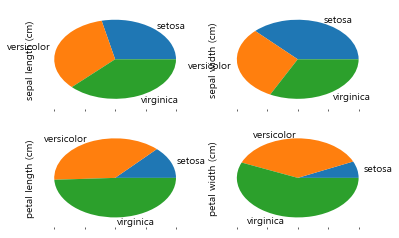

In [14]:
# 4개 구역 => layout(2,2) 나눠서 차트화
# legend : 범례
sums_by_species.plot( kind='pie', subplots=True, layout=(2,2), legend=False )

## 막대그래프 -> 바차트
- 원형차트와 목적은 동일
- 통상 막대그래프가 더 적합한 경우가 많다
- 여러 값을 상대적으로 크기 비교하기가 적합하다

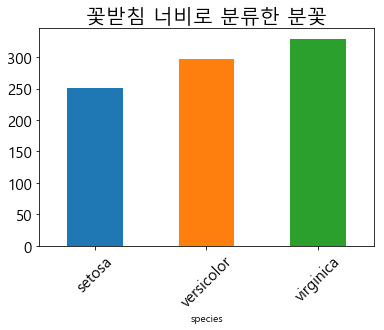

In [15]:
plt.title('꽃받침 너비로 분류한 분꽃', fontsize=20)
sums_by_species[ var_name ].plot( kind='bar', fontsize=15, rot=45 )

Text(0.5,0.98,'종별 전체 측정값 비교')

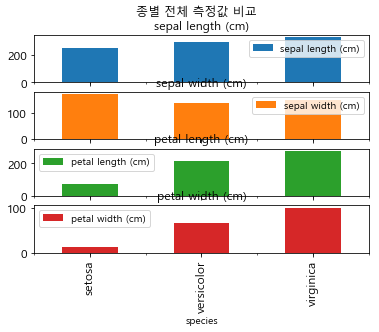

In [16]:
sums_by_species.plot( kind='bar', fontsize=12, subplots=True )
plt.suptitle('종별 전체 측정값 비교')

## 히스토그램

- 데이터의 중요한 특성을 보여줄때 사용
- 데이터의 분포의 특성, 이상치 여부, 데이터의 형태
- 실수모드, 정수모드
- 산포도와 다르게 수치가 한쪽만 있어도 가능

In [18]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


Text(0.5,0.98,'아이리스 히스토그램')

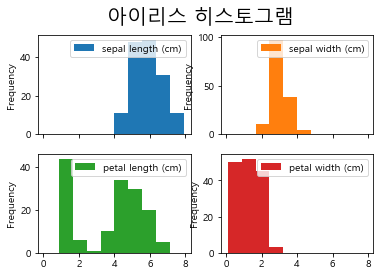

In [19]:
df.plot( kind='hist', subplots=True, layout=(2,2) )
plt.suptitle( '아이리스 히스토그램', fontsize=20 )
# 데이터의 분포의 특성을 볼수 있다 

In [21]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df['species'] == 'setosa'

Text(0.5,0.98,'종별 특성비교')

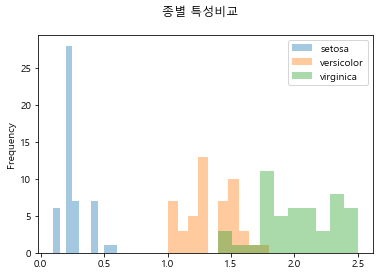

In [26]:
# 종별로 히스토그램을 그려보자 => 종별로 어디에 위치해 있는지가 판별
for spec in df['species'].unique():
    # 해당 종에 해당되는 데이터 추출
    spec_per_df = df[ df['species'] == spec ]
    # 종별 시각화
    spec_per_df[ df.columns[3] ].plot( kind='hist', alpha=0.4, label=spec )

plt.legend()
plt.suptitle('종별 특성비교')

## 상자그림(박스플롯)

- 데이터의 중간값, 최소값, 최대값, 사분위까지 손쉽게 표현
- seaborn을 통해 좀더 간겱하고 파워풀하게 사용가능
- seaborn
 > 산포행렬  
 > 시계열  
 > 산포도   
 > 박스플롯  
 > 선형회귀  
 > 변수 플로팅  

## 산포행렬

- 산포도는 오직 두종류만의 변수의 시각화만 다룬다 
- 더 많은 변수들간에 비교를 하고 싶다 => 산포행렬
- 간단하게, 변수들을 설명
- 데이터를 처음 만단다면 산포도를 활용하여 데이터를 살펴보는 것을 많이 추천
- 고려사항 
 > 색깔   : 데이터 표본의 범주를 구분 
 > 크기   : 데이터 포본를 더 크게부곽, 점크기 조절
 > 투명도 : 데이터가 겹칠때, 시각화에 도움이 되는 방식

## 산포도

## 산포도와 로그축

- 산포도에 로그를 씌우는 방법
- 사용에 적합한 케이스 
  > 데이터가 모두 양수  
  > 데이터간 크기 차이가 심하다 판단되는 경우=> 보정시 유용  
  > 웹사이트 방문자수는 수십배~ 수천배까지 차이가나서 산포도로를 표현이 어렴다
    => 산포도에 로그를 적용  

- 데이터 : 1978년도 보스턴 주택 가격 데이터
- 506개 타운 정보를 기반, 주택 가격(단위 1,000달러기준)
 > 주요 변수 : CRIM:범죄율, 공기관련사항(일산화질소 농도,..), 방수, 인구 중하위 계층의 비율, 학생/교사비율, 주택을 건축한 시가을 특정년도 기준 이전에 만들어진비율=>노후건물비중,재산세율,백인대흑인비율...

In [27]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt

In [29]:
# 데이터 로드 
bs = ds.load_boston()
len( bs['data'] )

506

In [31]:
len( bs.data )

506

In [39]:
bs.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
# 데이터 프레임 생성
# bs.feature_names : 데이터의 컬럼명, 
df = pd.DataFrame( bs.data, columns=bs.feature_names)

In [33]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [38]:
# 데이터의 설명
bs.DESCR[:10]

'Boston Hou'

In [35]:
df.shape

(506, 13)

In [36]:
# 정답
df[ 'house_price' ] = bs.target

In [37]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


Text(0.5,1,'1978년 보스턴 집값(1인당 범죄비율대비 집값 분포)')

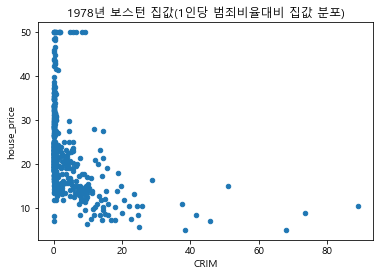

In [40]:
# 산포도 -> x는 인구 1인당 범죄발생비율, y는 집값 세팅, 차트종류:scatter
df.plot( kind='scatter', x='CRIM', y='house_price' )
plt.title('1978년 보스턴 집값(1인당 범죄비율대비 집값 분포)')
# 산포도로 시각화를 해보니, 
# 데이터의 특정 지점이 집중적으로 편차없이 배치가 되서
# 포인트들이 뭉개졌다. 구분이 잘 않된다. 
# 해당 구간을 펼쳐야 겟다 -> 설명


Text(0.5,1,'1978년 보스턴 집값(1인당 범죄비율대비 집값 분포)')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


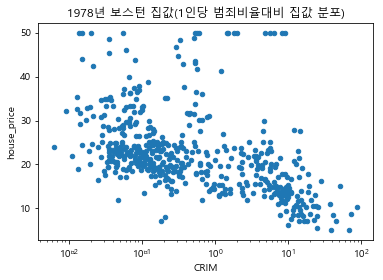

In [41]:
# 산포도의 로그 처리 => logx=True
df.plot( kind='scatter', x='CRIM', y='house_price', logx=True )
plt.title('1978년 보스턴 집값(1인당 범죄비율대비 집값 분포)')
# 상식적인 수준에 동일하게 범죄율이 낮아지면 집값이 높아진다는 것을 
# 로그처리를 함으로 해서 볼수 있었다

## 히트맵

- 데이터가 많으면 산포도가 지저분해진다
- 시각화 자체가 비효율적으로 구성이 된다
- 까만 점으로 밖에 않보인다!!
- 데이터가 많으면 표본의 한개 한개의 의미보다는, 전체적인 기세, 양상파악해야 한다
- 이럴 경우 히트맵 사용
- 구역의 데이터 밀도를 표현

## 상관관계

- 두변수 X, Y에 대해 얼마나 비슷하게, 영향을 끼지면서 움직이는지 측정
- 피어슨 상관관계
 > Y = mx + b    
 > 1차 함수로 관계를 설명하는 방법   
 > 상관계수가 1에 가까우면 m은 양수
 > 상관계수가 -1에 가까우면 m은 음수
- 순서형 상관관계
 > X,Y 관계를 1차함수와 같은 특정한 형태로 제한하지 않는다(자유롭다)  
 > 포인트 , X가 증가하면, Y도 증가 했는가!! 집중
 > 사람 => 키, 몸무게 이들의 관계성 고려
 > 키를 기준으로 , 몸무게 기준으로 정렬 -> 데이터의 흐름(증가, 감소) 관계 집중
 > 스피어먼, 켄들 방식들이 존재

## 시계열

- 주식, 웹사이트, 혈당량, 매출 등등 대상
- 시간기준으로 데이터가 지속적으로 발생 => 예측
- 차후 페이스북 제공하는 시계열 처리 모듈을 사용!!
- 선형그래프, 봉차트, 바차트등을 같이 병행
- 금융공학, 퀀트들이 자주 사용
- 뒷쪽에서 별도로 따로 확인